In [1]:
#подгружаю необходимые библиотеки
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import boxplot
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import neural_network
from sklearn.neural_network import MLPRegressor

In [2]:
#Загрузка DF
df_bp = pd.read_excel ("E:/1Work/VKR/X_bp.xlsx")
df_nup = pd.read_excel ("E:/1Work/VKR/X_nup.xlsx")

In [3]:
#ДФ загружен, начинаю работу с данными. в первую очередь необходимо проанализировать входные данные на предмет 
#пропусков и выбросов. Для этого построю гистограммы и диаграммы и "ящик с усами"
#выбор стиля гистограмм
mpl.style.use(['classic'])

In [4]:
#Объединение ДФ
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
#left_index = True, right_index = True - Это объединение по индексам
#how = 'inner' - способ объединения, только совпадающие параметры (удаляются лишние записи из первого DF)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [5]:
#Для дальнейшей работы переименую стобцы по англ.
df.rename(columns = {'Соотношение матрица-наполнитель' : 'Matrix', 'Плотность, кг/м3' : 'Density'
                    , 'модуль упругости, ГПа' : 'E', 'Количество отвердителя, м.%' : 'Hardener'
                    , 'Содержание эпоксидных групп,%_2' : 'Epoxide', 'Температура вспышки, С_2' : 'T'
                    , 'Поверхностная плотность, г/м2' : 'Surface density', 'Модуль упругости при растяжении, ГПа' : 'E_Tensil'
                    , 'Прочность при растяжении, МПа' : 'Strength', 'Потребление смолы, г/м2' : 'Resin'
                    , 'Угол нашивки, град' : 'Tangle_stripe', 'Шаг нашивки' : 'Step_stripe'
                    , 'Плотность нашивки' : 'Density_stripe'}, inplace = True)

In [6]:
df

,Matrix,Density,E,Hardener,Epoxide,T,Surface density,E_Tensil,Strength,Resin,Tangle_stripe,Step_stripe,Density_stripe
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [7]:
#Делаю копию ДФ, если что буду сравнивать потом 
df_1 = df.copy()
df_1.tail(10)

,Matrix,Density,E,Hardener,Epoxide,T,Surface density,E_Tensil,Strength,Resin,Tangle_stripe,Step_stripe,Density_stripe
1013,2.310394,1931.146887,554.010341,96.749782,22.146487,214.827727,56.242761,78.143609,1939.307550,87.270139,90,7.683346,62.785021
1014,1.646235,2014.772547,841.064806,102.979906,21.073367,271.490843,615.168127,79.154469,2518.516089,232.428214,90,5.048503,59.837798
1015,2.806563,1872.864660,996.018683,146.199194,21.559290,313.900486,799.634090,72.815552,2443.482888,307.265172,90,5.240448,52.044507
1016,3.745862,1914.629424,680.683701,110.979100,25.922635,309.796388,628.364550,76.030555,2466.925422,152.184720,90,8.057020,47.067229
1017,2.758727,2000.506141,934.564388,143.021859,21.379518,273.852679,65.105965,67.633752,3102.539548,229.780372,90,8.736592,60.277805
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074
1022,3.808020,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,90,6.078902,77.434468


In [8]:
df_1.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Matrix,1023.0,3.0,1.0,0.0,2.0,3.0,4.0,6.0
Density,1023.0,1976.0,74.0,1732.0,1924.0,1978.0,2021.0,2208.0
E,1023.0,740.0,330.0,2.0,500.0,740.0,962.0,1912.0
Hardener,1023.0,111.0,28.0,18.0,92.0,111.0,130.0,199.0
Epoxide,1023.0,22.0,2.0,14.0,21.0,22.0,24.0,33.0
T,1023.0,286.0,41.0,100.0,259.0,286.0,313.0,413.0
Surface density,1023.0,483.0,281.0,1.0,267.0,452.0,693.0,1400.0
E_Tensil,1023.0,73.0,3.0,64.0,71.0,73.0,75.0,83.0
Strength,1023.0,2467.0,486.0,1037.0,2136.0,2460.0,2767.0,3848.0
Resin,1023.0,218.0,60.0,34.0,180.0,219.0,257.0,415.0


In [9]:
#проверка данных на наличие нулевых строчек
df_1.isnull().sum()

Matrix             0
Density            0
E                  0
Hardener           0
Epoxide            0
T                  0
Surface density    0
E_Tensil           0
Strength           0
Resin              0
Tangle_stripe      0
Step_stripe        0
Density_stripe     0
dtype: int64

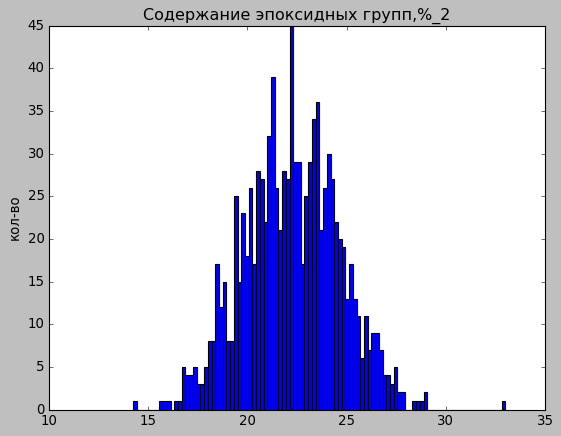

In [10]:
#Гистограмма по эпоксидным группам
plt.title("Содержание эпоксидных групп,%_2")
plt.ylabel("кол-во")
plt.hist(df["Epoxide"], bins = 100)
plt.show()

In [11]:
df_1 = df_1.drop(df_1[df_1['Epoxide'] > 28].index)
df_1 = df_1.drop(df_1[df_1['Epoxide'] < 15].index)


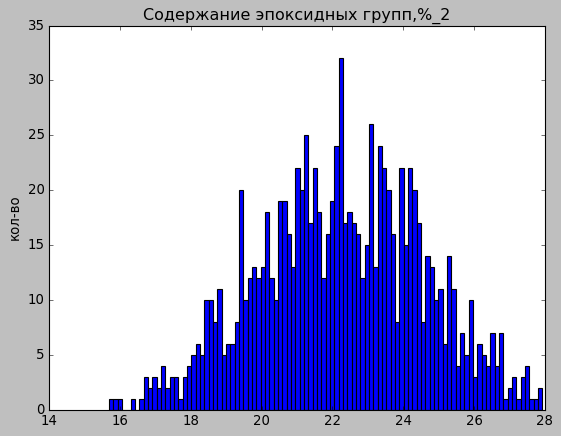

In [12]:
plt.title("Содержание эпоксидных групп,%_2")
plt.ylabel("кол-во")
plt.hist(df_1["Epoxide"], bins = 100)
plt.show()

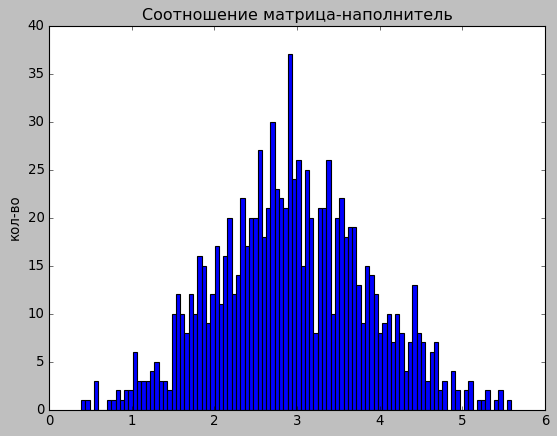

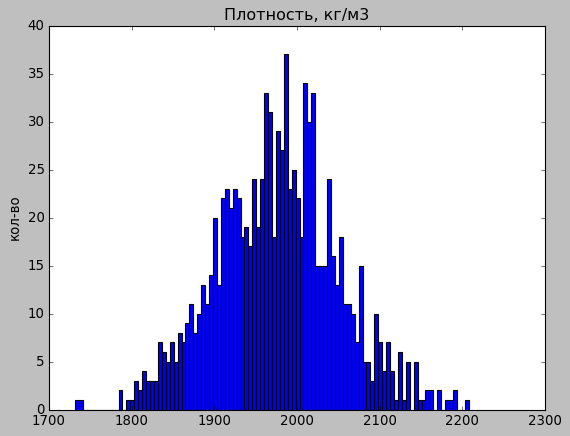

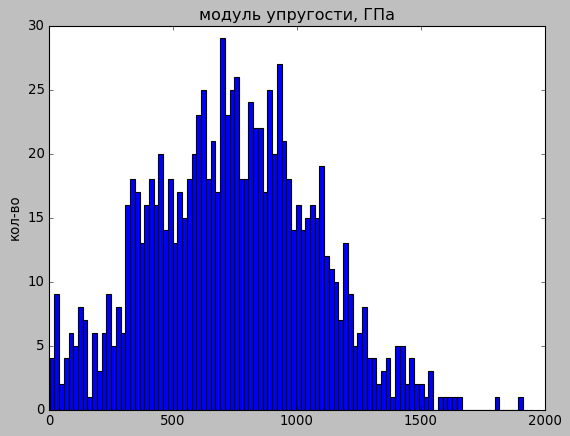

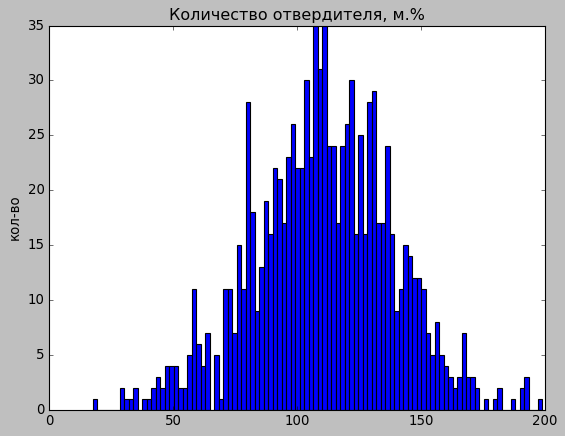

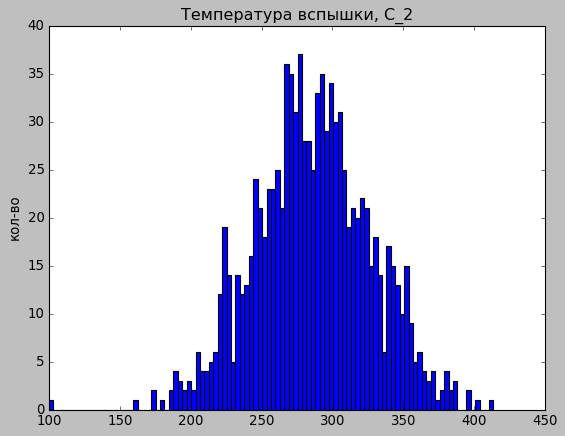

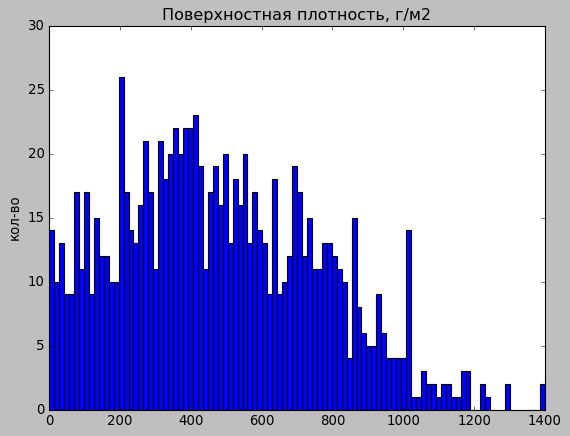

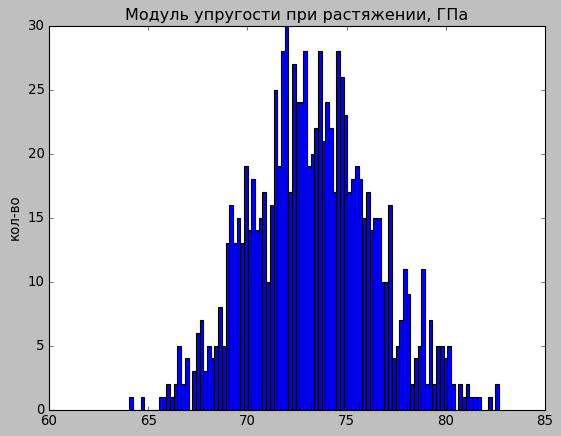

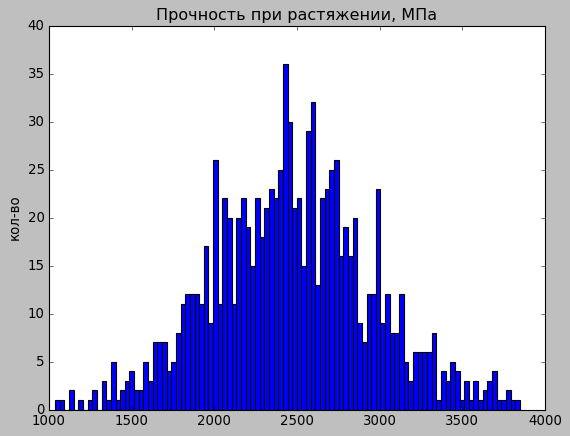

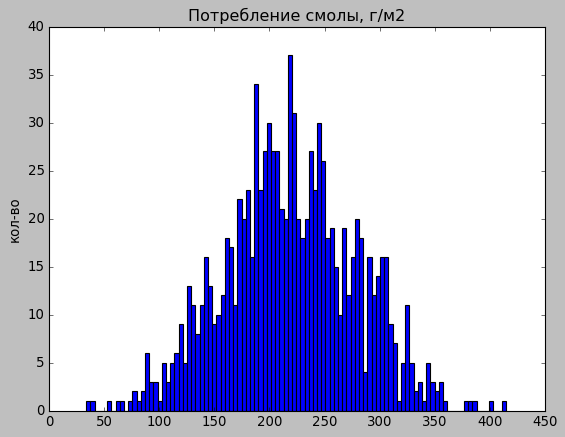

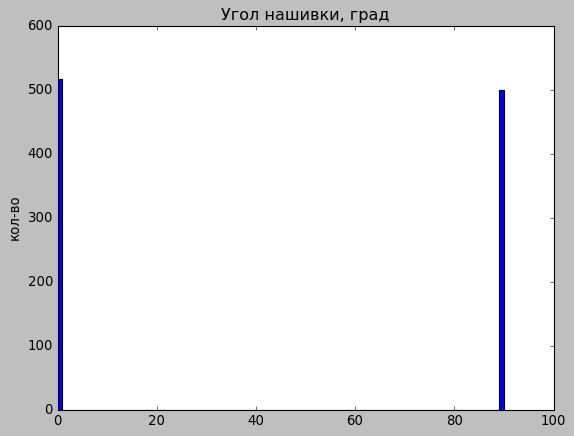

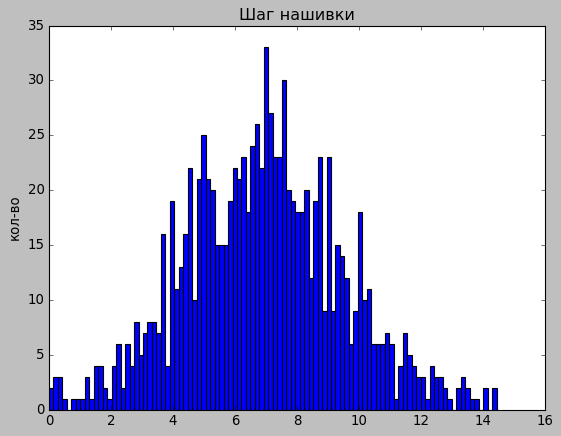

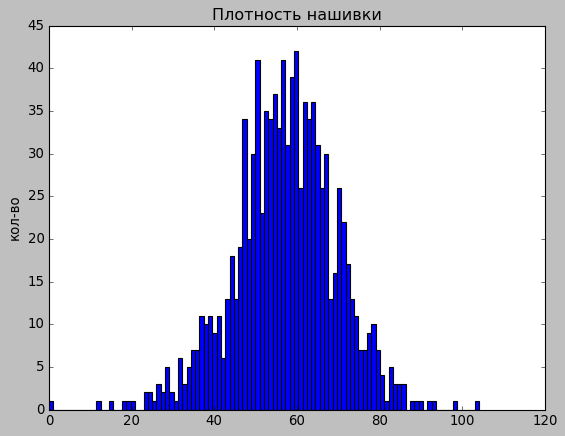

In [13]:
#Построение гистограмм для всех групп
plt.title("Соотношение матрица-наполнитель")
plt.ylabel("кол-во")
plt.hist(df_1["Matrix"], bins = 100)
plt.show()
plt.title("Плотность, кг/м3")
plt.ylabel("кол-во")
plt.hist(df_1["Density"], bins = 100)
plt.show()
plt.title("модуль упругости, ГПа")
plt.ylabel("кол-во")
plt.hist(df_1["E"], bins = 100)
plt.show()
plt.title("Количество отвердителя, м.%")
plt.ylabel("кол-во")
plt.hist(df_1["Hardener"], bins = 100)
plt.show()
plt.title("Температура вспышки, С_2")
plt.ylabel("кол-во")
plt.hist(df_1["T"], bins = 100)
plt.show()
plt.title("Поверхностная плотность, г/м2")
plt.ylabel("кол-во")
plt.hist(df_1["Surface density"], bins = 100)
plt.show()
plt.title("Модуль упругости при растяжении, ГПа")
plt.ylabel("кол-во")
plt.hist(df_1["E_Tensil"], bins = 100)
plt.show()
plt.title("Прочность при растяжении, МПа")
plt.ylabel("кол-во")
plt.hist(df_1["Strength"], bins = 100)
plt.show()
plt.title("Потребление смолы, г/м2")
plt.ylabel("кол-во")
plt.hist(df_1["Resin"], bins = 100)
plt.show()
plt.title("Угол нашивки, град")
plt.ylabel("кол-во")
plt.hist(df_1["Tangle_stripe"], bins = 100)
plt.show()
plt.title("Шаг нашивки")
plt.ylabel("кол-во")
plt.hist(df_1["Step_stripe"], bins = 100)
plt.show()
plt.title("Плотность нашивки")
plt.ylabel("кол-во")
plt.hist(df_1["Density_stripe"], bins = 100)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2069ca21040>,
 'caps': [<matplotlib.lines.Line2D at 0x2069ca21910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069ca21b20>,
 'medians': [<matplotlib.lines.Line2D at 0x2069ca54280>,
 'fliers': [<matplotlib.lines.Line2D at 0x2069ca54610>,
 'means': []}

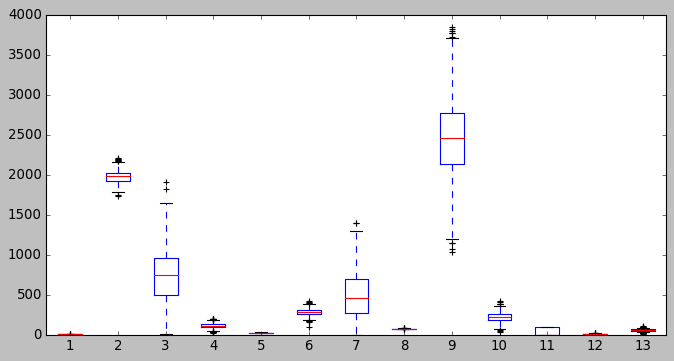

In [14]:
#Построение диаграммы "ящик с усами"
plt.figure(figsize=(10, 5))
boxplot(df_1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2069cd2d700>,
 'caps': [<matplotlib.lines.Line2D at 0x2069cd2de20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069cd2d3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2069cd4c580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069cd4c910>],
 'means': []}

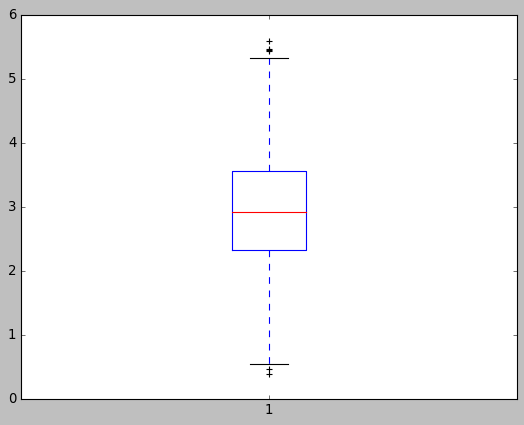

In [15]:
boxplot(df_1['Matrix'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2069cc98670>,
 'caps': [<matplotlib.lines.Line2D at 0x2069cc98d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069cc982e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2069cc7d4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069cc7d880>],
 'means': []}

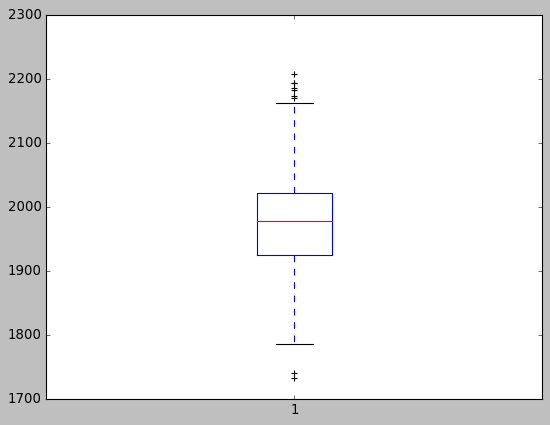

In [16]:
boxplot(df_1['Density'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2069ca16280>,
 'caps': [<matplotlib.lines.Line2D at 0x2069ca169a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069c713eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2069ca0d100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069ca0d490>],
 'means': []}

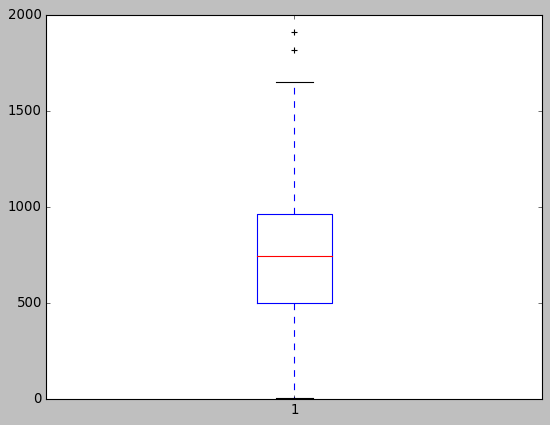

In [17]:
boxplot(df_1['E'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2069ce56310>,
 'caps': [<matplotlib.lines.Line2D at 0x2069ce56a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069ce31f40>],
 'medians': [<matplotlib.lines.Line2D at 0x2069cb8b190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069cb8b520>],
 'means': []}

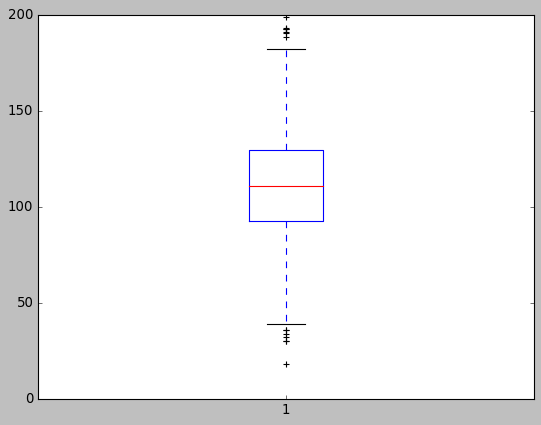

In [18]:
boxplot(df_1['Hardener'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2069e0021f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2069e002910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069e01ee20>],
 'medians': [<matplotlib.lines.Line2D at 0x2069e004070>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069e004400>],
 'means': []}

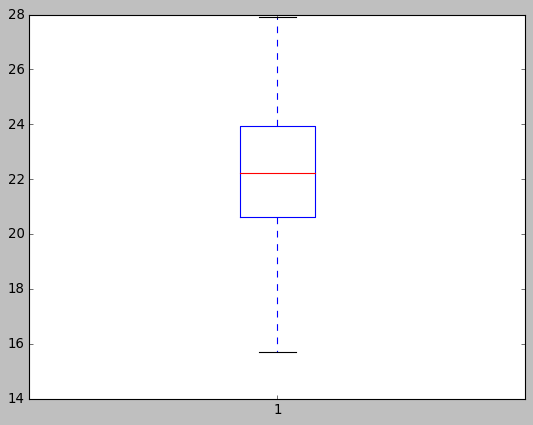

In [19]:
boxplot(df_1['Epoxide'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2069dfd95b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2069dfd9cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069dfd91f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2069dfc3430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069dfc37c0>],
 'means': []}

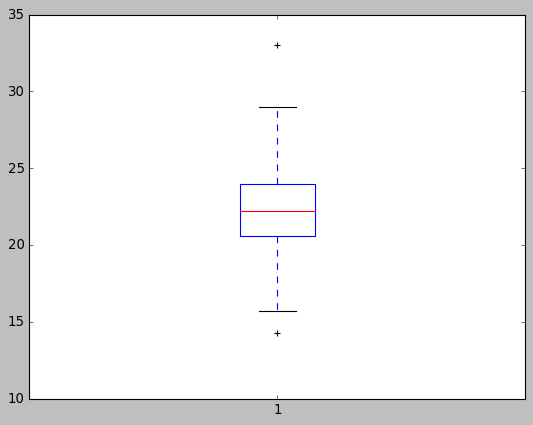

In [20]:
boxplot(df['Epoxide'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2069c8a8b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2069c8d12e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069c8a87f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2069c8d1a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069c8d1d90>],
 'means': []}

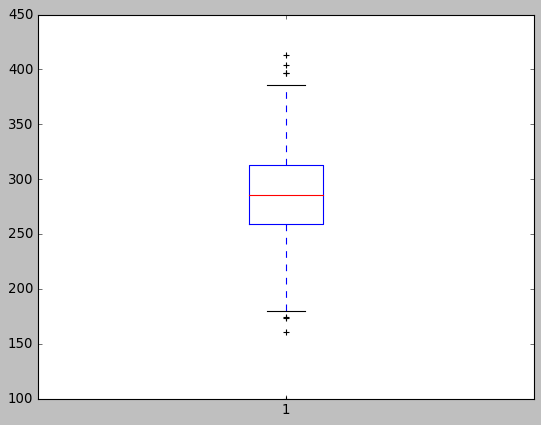

In [21]:
boxplot(df_1['T'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2069c96de20>,
 'caps': [<matplotlib.lines.Line2D at 0x2069c9a0580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069c96da90>],
 'medians': [<matplotlib.lines.Line2D at 0x2069c9a0ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069c9df070>],
 'means': []}

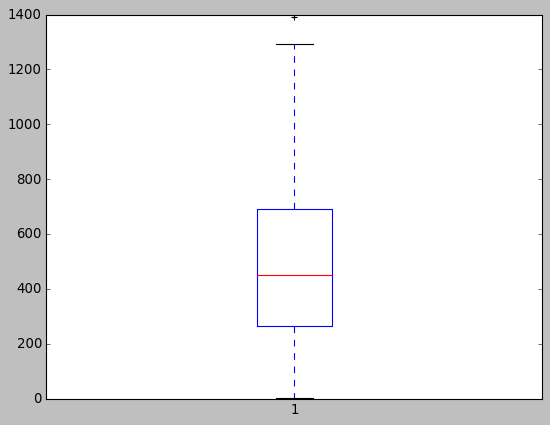

In [22]:
boxplot(df_1['Surface density'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2069caeb2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2069caeb9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069cb07ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x2069cb0f130>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069cb0f4c0>],
 'means': []}

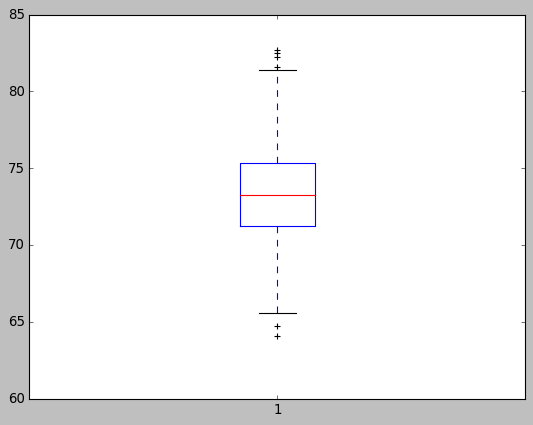

In [23]:
boxplot(df_1['E_Tensil'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2069ce99880>,
 'caps': [<matplotlib.lines.Line2D at 0x2069ce99fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069ce994f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2069ce88700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069ce88a90>],
 'means': []}

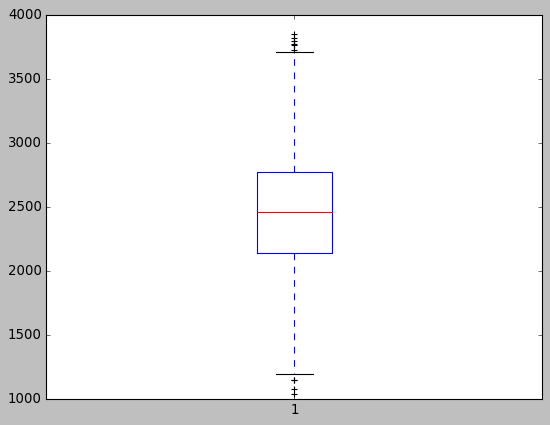

In [24]:
boxplot(df_1['Strength'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2069c8e15b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2069c8e1cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069c8e1220>],
 'medians': [<matplotlib.lines.Line2D at 0x2069c8ee430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069c8ee7c0>],
 'means': []}

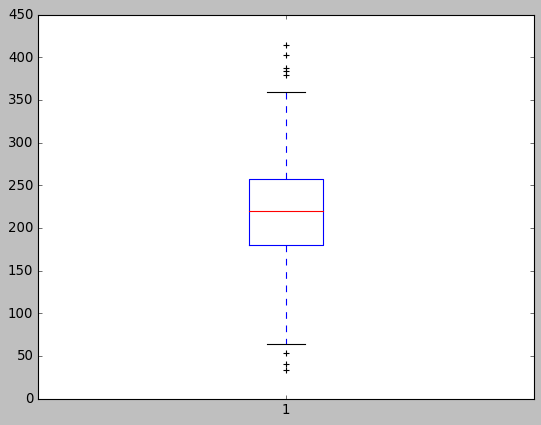

In [25]:
boxplot(df_1['Resin'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2069cb56580>,
 'caps': [<matplotlib.lines.Line2D at 0x2069cb56c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069cb561f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2069cbe23d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069cbe2760>],
 'means': []}

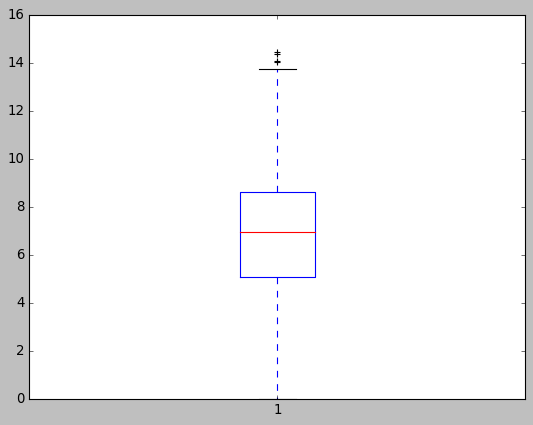

In [26]:
boxplot(df_1['Step_stripe'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2069cd997f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2069cd99f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069cd99460>],
 'medians': [<matplotlib.lines.Line2D at 0x2069cda8670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2069cda8a00>],
 'means': []}

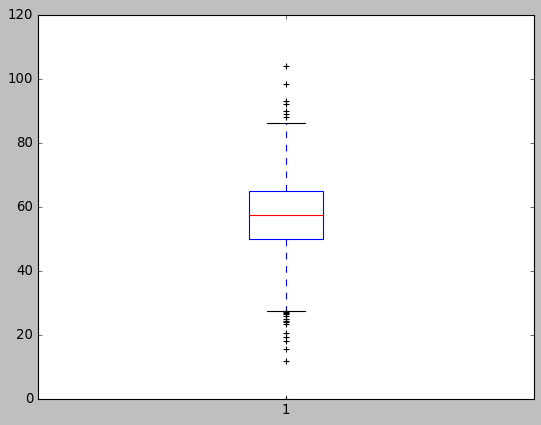

In [27]:
boxplot(df_1['Density_stripe'])

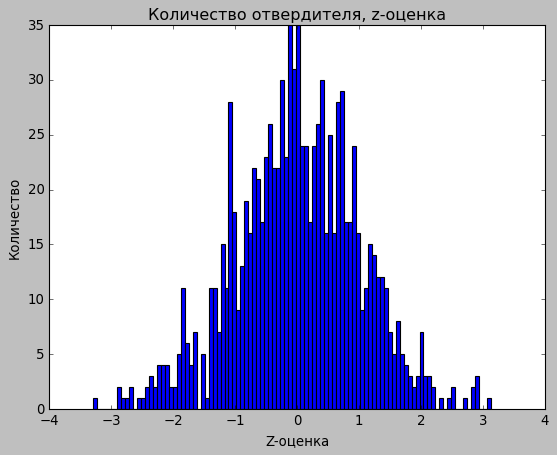

In [28]:
def plot_hist(x, title="", xlabel=""):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Количество")
    plt.hist(x, bins = 100)
    plt.show()
df_1["Hardener"] = (df_1["Hardener"] - df_1["Hardener"].mean()) / df_1["Hardener"].std()
plot_hist(df_1["Hardener"], title="Количество отвердителя, z-оценка", xlabel="Z-оценка")


In [29]:
#Нормализация данных
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df_1.columns
d = scaler.fit_transform(df_1)
norm_df_1 = pd.DataFrame(d, columns=names).round(2)
norm_df_1.head()

,Matrix,Density,E,Hardener,Epoxide,T,Surface density,E_Tensil,Strength,Resin,Tangle_stripe,Step_stripe,Density_stripe
0,0.28,0.63,0.39,0.07,0.54,0.00,0.15,0.32,0.7,0.49,0.0,0.28,0.55
1,0.28,0.63,0.39,0.18,0.66,0.59,0.15,0.32,0.7,0.49,0.0,0.28,0.58
2,0.28,0.63,0.39,0.61,0.45,0.64,0.15,0.32,0.7,0.49,0.0,0.35,0.45
3,0.46,0.63,0.39,0.52,0.54,0.59,0.15,0.32,0.7,0.49,0.0,0.35,0.55
4,0.46,0.56,0.39,0.52,0.54,0.59,0.15,0.32,0.7,0.49,0.0,0.35,0.58


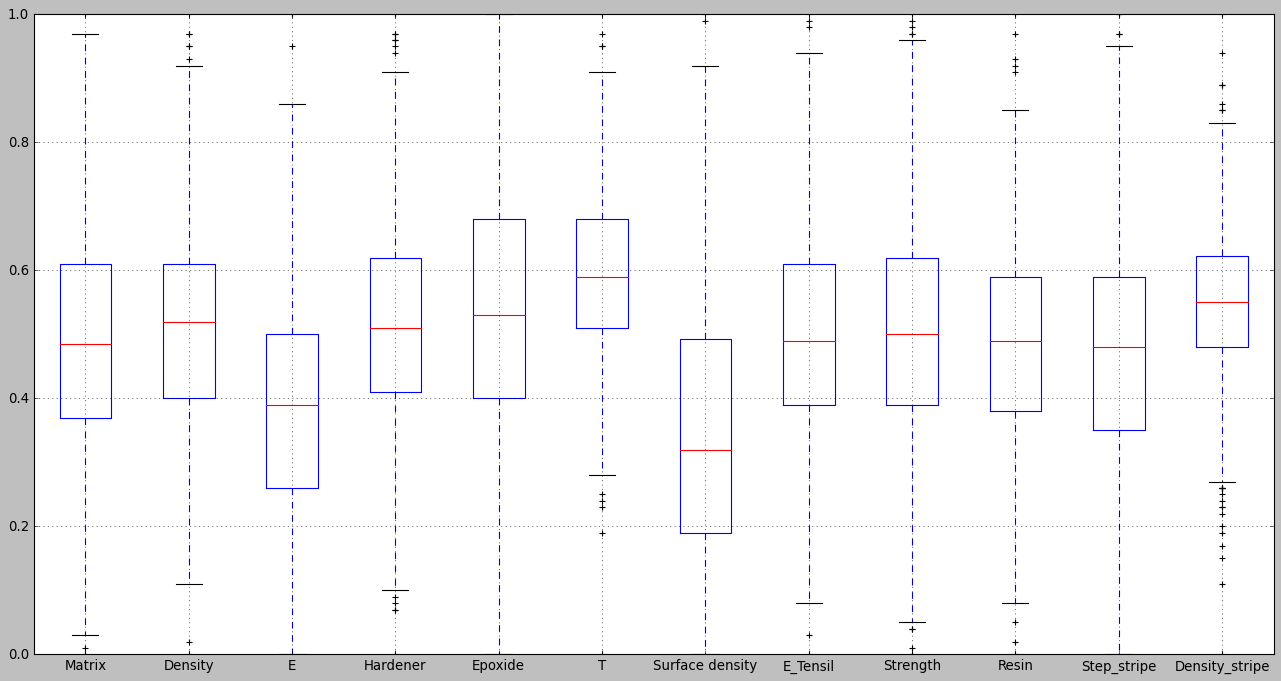

In [30]:
boxplot = norm_df_1.boxplot(column=['Matrix', 'Density', 'E',
                               'Hardener', 'Epoxide', 'T', 'Surface density', 
                               'E_Tensil', 'Strength', 'Resin', 
                               'Step_stripe', 'Density_stripe'], figsize = (20,10), ) 

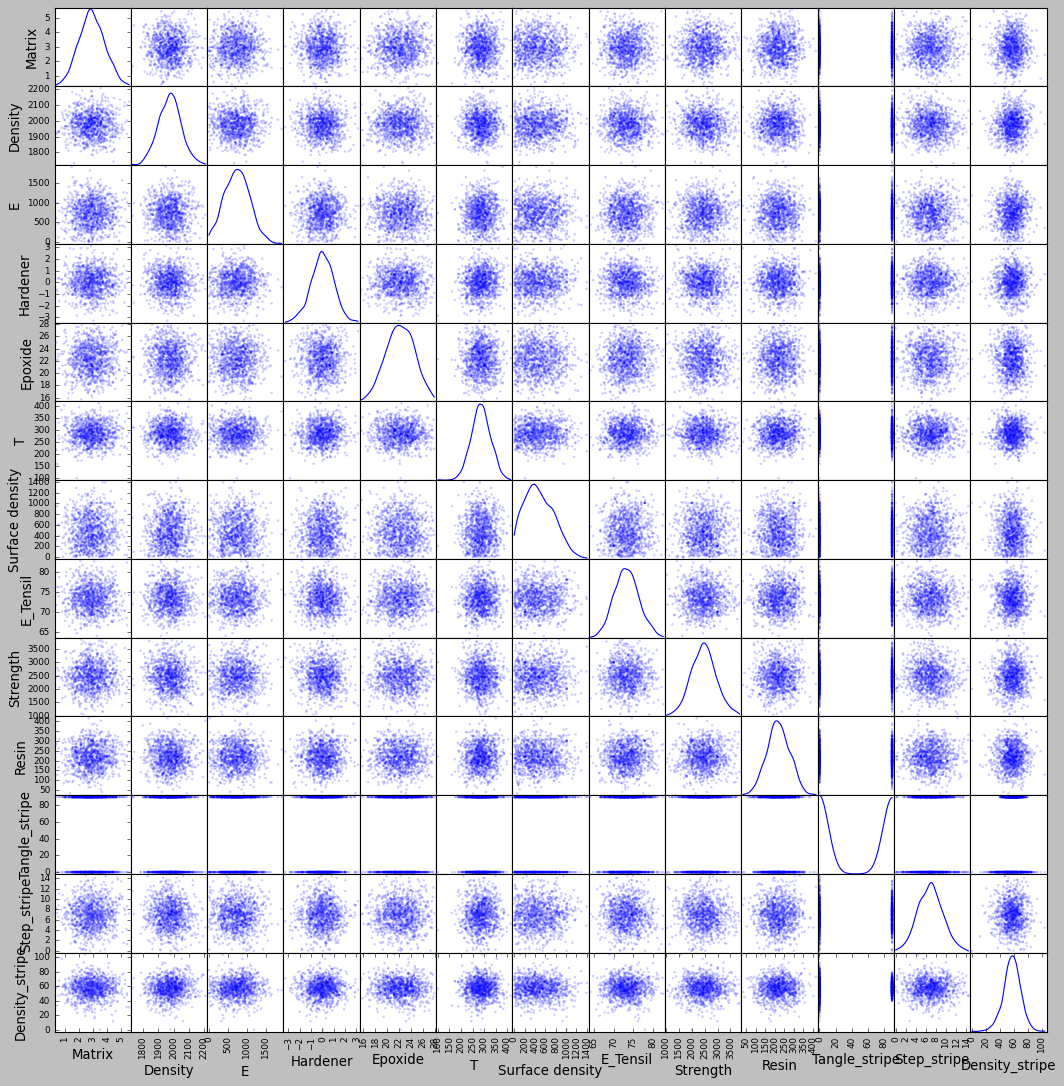

In [31]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_1, alpha=0.2, figsize=(16, 16), diagonal='kde');

<AxesSubplot:>

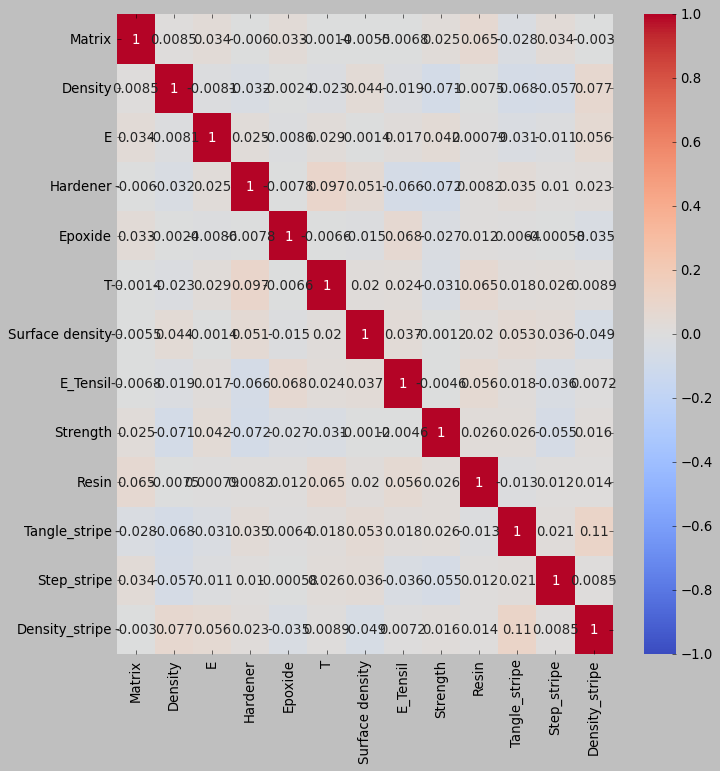

In [32]:
#Матрица кореляции
plt.figure(figsize=(10, 10))
sns.heatmap(df_1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [33]:
#Разделяю ДФ на входные данные и целевые, и делаю 3 отдельные выходные матрицы
y_df = df_1[["Matrix", "E_Tensil", "Strength"]]
y_df

,Matrix,E_Tensil,Strength
0,1.857143,70.000000,3000.000000
1,1.857143,70.000000,3000.000000
3,1.857143,70.000000,3000.000000
4,2.771331,70.000000,3000.000000
5,2.767918,70.000000,3000.000000
...,...,...,...
1018,2.271346,73.090961,2387.292495
1019,3.444022,72.920827,2360.392784
1020,3.280604,74.734344,2662.906040
1021,3.705351,74.042708,2071.715856


In [34]:
y1_df = df_1[["Matrix"]]
y1_df

,Matrix
0,1.857143
1,1.857143
3,1.857143
4,2.771331
5,2.767918
...,...
1018,2.271346
1019,3.444022
1020,3.280604
1021,3.705351


In [35]:
y2_df = df_1[["E_Tensil"]]
y2_df

,E_Tensil
0,70.000000
1,70.000000
3,70.000000
4,70.000000
5,70.000000
...,...
1018,73.090961
1019,72.920827
1020,74.734344
1021,74.042708


In [36]:
y3_df = df_1[["Strength"]]
y3_df

,Strength
0,3000.000000
1,3000.000000
3,3000.000000
4,3000.000000
5,3000.000000
...,...
1018,2387.292495
1019,2360.392784
1020,2662.906040
1021,2071.715856


In [37]:
df_1 = df_1.drop (["Matrix", "E_Tensil", "Strength"], axis =1)

In [38]:
df_1

,Density,E,Hardener,Epoxide,T,Surface density,Resin,Tangle_stripe,Step_stripe,Density_stripe
0,2030.000000,738.736842,-2.853026,22.267857,100.000000,210.000000,220.000000,0,4.000000,57.000000
1,2030.000000,738.736842,-2.144620,23.750000,284.615385,210.000000,220.000000,0,4.000000,60.000000
3,2030.000000,738.736842,0.653583,21.250000,300.000000,210.000000,220.000000,0,5.000000,47.000000
4,2030.000000,753.000000,0.046479,22.267857,284.615385,210.000000,220.000000,0,5.000000,57.000000
5,2000.000000,748.000000,0.046479,22.267857,284.615385,210.000000,220.000000,0,5.000000,60.000000
...,...,...,...,...,...,...,...,...,...,...
1018,1952.087902,912.855545,-0.834346,20.123249,324.774576,209.198700,125.007669,90,9.076380,47.019770
1019,2050.089171,444.732634,1.255089,19.599769,254.215401,350.660830,117.730099,90,10.565614,53.750790
1020,1972.372865,416.836524,-0.000507,23.957502,248.423047,740.142791,236.606764,90,4.161154,67.629684
1021,2066.799773,741.475517,1.092722,19.246945,275.779840,641.468152,197.126067,90,6.313201,58.261074


<AxesSubplot:>

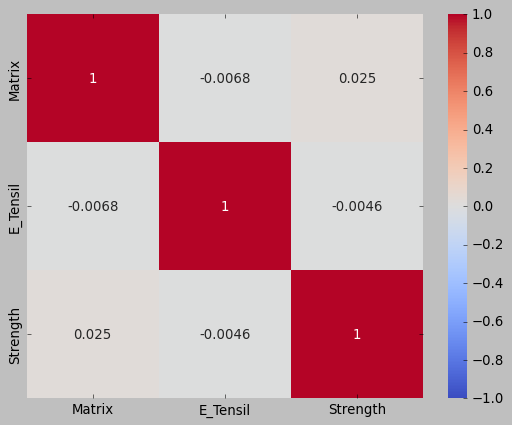

In [39]:
sns.heatmap(y_df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

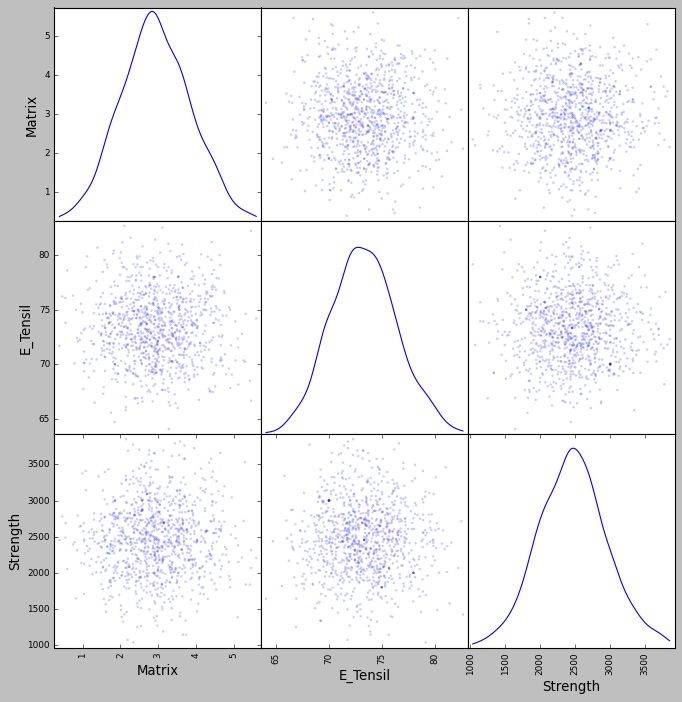

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(y_df, alpha=0.2, figsize=(10, 10), diagonal='kde');

In [41]:
#Построение первой модели. Попытка найти зависимость между всеми входными параметрами 
#и каждым (по отдельности) целевым параметром. Первый целевой параметр приму Матрицу-наполнитель
X = df_1.copy()


In [42]:
#Разделение выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1_df, test_size=0.3, random_state=1)

In [43]:
model = Sequential([
    Dense(10, activation='relu', input_dim=10),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, ),
])

model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 100)               1100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 31,611
Trainable params: 31,611
Non-traina

In [44]:
model_1 = model.fit(X_train, y1_train, batch_size=64, epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 18.1786 - mse: 473.2493
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 4.6050 - mse: 29.9628
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 2.1912 - mse: 7.5308
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1.2576 - mse: 2.5074
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.2428 - mse: 2.4367
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1032 - mse: 1.9175
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8513 - mse: 1.1396
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9601 - mse: 1.4737
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1802 - mse: 2.0787
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9354 - mse: 1.4193
Epoch 11/100
12/12 [==============================] - 0

12/12 [==============================] - 0s 2ms/step - loss: 0.8095 - mse: 1.0081
Epoch 88/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7454 - mse: 0.8645
Epoch 89/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7837 - mse: 0.9473
Epoch 90/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7585 - mse: 0.9060
Epoch 91/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7822 - mse: 0.9533
Epoch 92/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7352 - mse: 0.8776
Epoch 93/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7217 - mse: 0.8310
Epoch 94/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7171 - mse: 0.8072
Epoch 95/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7301 - mse: 0.8315
Epoch 96/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7053 - mse: 0.8014
Epoch 97/100
12/12 [==============================] - 0s 2ms/st

In [45]:
y1_pred = model.predict(X_test)

In [46]:
model.evaluate(X_test, y1_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.8469 - mse: 1.0811


[0.8469349145889282, 1.0811316967010498]

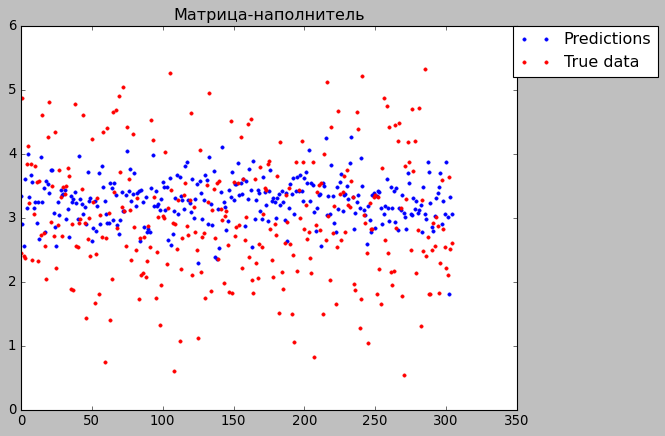

In [47]:
plt.plot(y1_pred, 'b.')
plt.plot(y1_test.reset_index(drop=True),'r.')

plt.legend(['Predictions', 'True data'],bbox_to_anchor=(1.3,1.02))
plt.title('Матрица-наполнитель');

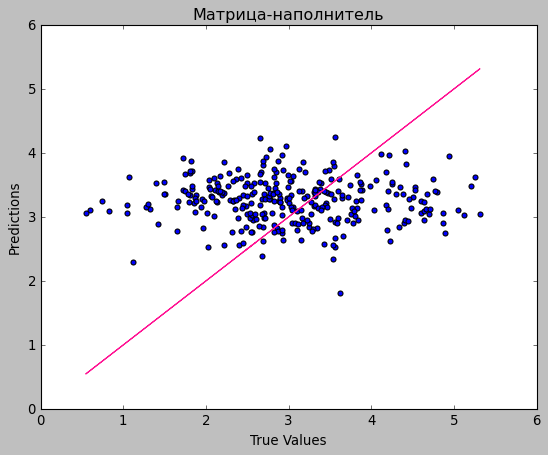

In [48]:
plt.scatter(y1_test, y1_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(y1_test, y1_test, c = 'deeppink')
plt.title('Матрица-наполнитель');
#plt.scatter

In [49]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2_df, test_size=0.3, random_state=1)

In [50]:
model_2 = model.fit(X_train, y2_train, batch_size=64, epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 60.8389 - mse: 3803.4878
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 14.7894 - mse: 334.3029
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 7.3334 - mse: 83.4434
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 5.6179 - mse: 48.7555
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 5.1061 - mse: 41.3668
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 5.0030 - mse: 38.6358
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 4.5043 - mse: 31.6458
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 4.3403 - mse: 29.0462
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 4.3005 - mse: 28.4863
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 4.1800 - mse: 26.7156
Epoch 11/100
12/12 [========================

12/12 [==============================] - 0s 2ms/step - loss: 3.4534 - mse: 18.6031
Epoch 87/100
12/12 [==============================] - 0s 2ms/step - loss: 3.3196 - mse: 16.9787
Epoch 88/100
12/12 [==============================] - 0s 2ms/step - loss: 3.3351 - mse: 17.1395
Epoch 89/100
12/12 [==============================] - 0s 2ms/step - loss: 3.3728 - mse: 17.7454
Epoch 90/100
12/12 [==============================] - 0s 2ms/step - loss: 3.2962 - mse: 16.8932
Epoch 91/100
12/12 [==============================] - 0s 2ms/step - loss: 3.3577 - mse: 17.4492
Epoch 92/100
12/12 [==============================] - 0s 2ms/step - loss: 3.2910 - mse: 17.0727
Epoch 93/100
12/12 [==============================] - 0s 2ms/step - loss: 3.5769 - mse: 19.9598
Epoch 94/100
12/12 [==============================] - 0s 2ms/step - loss: 4.1479 - mse: 26.6664
Epoch 95/100
12/12 [==============================] - 0s 2ms/step - loss: 3.2778 - mse: 16.6060
Epoch 96/100
12/12 [==============================] -

In [51]:
model.evaluate(X_test, y2_test)

10/10 [==============================] - 0s 1ms/step - loss: 3.4225 - mse: 18.6318


[3.422501802444458, 18.63176155090332]

In [52]:
y2_pred =  model.predict(X_test) 

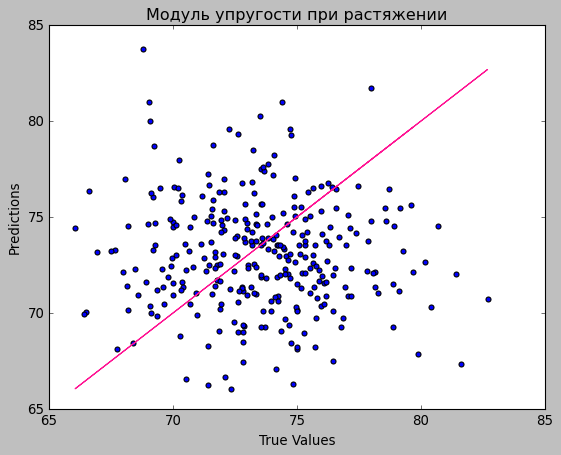

In [53]:
plt.scatter(y2_test, y2_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(y2_test, y2_test, c = 'deeppink')
plt.title('Модуль упругости при растяжении');
#plt.scatter

In [54]:
X_train, X_test, y3_train, y3_test = train_test_split(X, y3_df, test_size=0.3, random_state=1)
model_3 = model.fit(X_train, y3_train, batch_size=64, epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 2272.0110 - mse: 5436834.5000
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 758.0988 - mse: 803417.5625
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 466.1219 - mse: 336698.0625
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 444.9584 - mse: 310695.9375
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 403.5072 - mse: 257022.3750
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 429.3724 - mse: 288053.6250
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 448.2515 - mse: 306007.7500
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 417.6892 - mse: 277543.0000
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 427.9291 - mse: 285238.3750
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 404.6136 - mse:

12/12 [==============================] - 0s 2ms/step - loss: 417.6474 - mse: 272935.4375
Epoch 82/100
12/12 [==============================] - 0s 2ms/step - loss: 420.3449 - mse: 277987.2188
Epoch 83/100
12/12 [==============================] - 0s 2ms/step - loss: 402.5036 - mse: 256437.9219
Epoch 84/100
12/12 [==============================] - 0s 2ms/step - loss: 404.2555 - mse: 258512.0469
Epoch 85/100
12/12 [==============================] - 0s 2ms/step - loss: 417.5570 - mse: 270699.0312
Epoch 86/100
12/12 [==============================] - 0s 2ms/step - loss: 414.1626 - mse: 270409.3750
Epoch 87/100
12/12 [==============================] - 0s 2ms/step - loss: 406.7425 - mse: 260167.8125
Epoch 88/100
12/12 [==============================] - 0s 2ms/step - loss: 404.3974 - mse: 256699.5938
Epoch 89/100
12/12 [==============================] - 0s 2ms/step - loss: 409.7850 - mse: 262658.6875
Epoch 90/100
12/12 [==============================] - 0s 2ms/step - loss: 399.4438 - mse: 25163

In [55]:
y3_pred =  model.predict(X_test) 

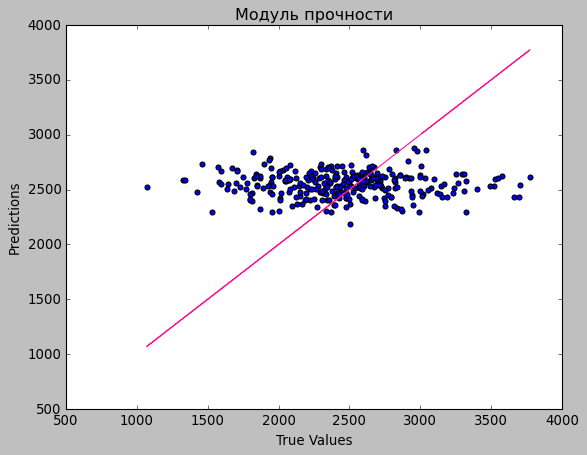

In [56]:
plt.scatter(y3_test, y3_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(y3_test, y3_test, c = 'deeppink')
plt.title('Модуль прочности');
#plt.scatter

In [57]:
#попытка увеличить точность модели, увеличением кол-во нейронов в слое

In [58]:
#Построение модели для 3х выходов
X_train, X_test, y_train, y_test = train_test_split(X, y_df, test_size=0.3, random_state=1)

In [59]:
model = Sequential([
    Dense(10, activation='relu', input_dim=10),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(3, ),
])

model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 100)               1100      
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 3)                 303       
                                                                 
Total params: 21,713
Trainable params: 21,713
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1000us/step - loss: 929.4438 - mse: 2293333.5000


[929.44384765625, 2293333.5]

In [61]:
y_pred = model.predict(X_test)

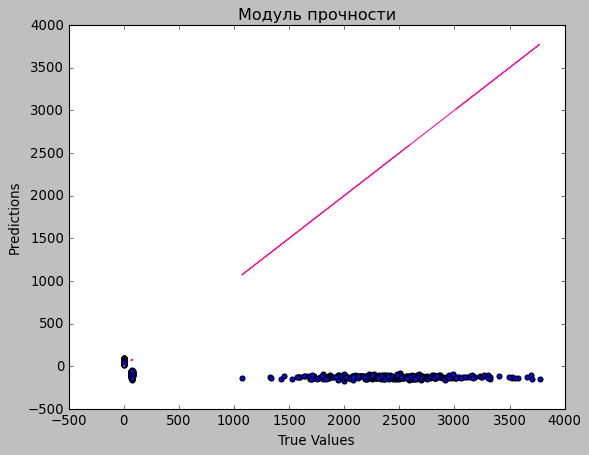

In [62]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(y_test, y_test, c = 'deeppink')
plt.title('Модуль прочности');
#plt.scatter

In [63]:
#Построение регрессора "случайный лес"

In [64]:
rf = RandomForestRegressor(random_state = 42)

In [65]:
param_grid = {
    'max_depth': [10],
    'n_estimators': [900]
};

In [66]:
grid_search_rf_reg = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1)

In [67]:
grid_search_rf_reg.fit(X_train, y3_train);

C:\Users\fesss\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [68]:
grid_search_rf_reg.best_params_

{'max_depth': 10, 'n_estimators': 900}

In [69]:
print("Train score:", grid_search_rf_reg.score(X_train, y3_train))

Train score: 0.6499328833807612


In [70]:
print("Test score:", grid_search_rf_reg.score(X_test, y3_test))

Test score: -0.1054333975308388


In [71]:
y3_pred = grid_search_rf_reg.predict(X_test).round(2)

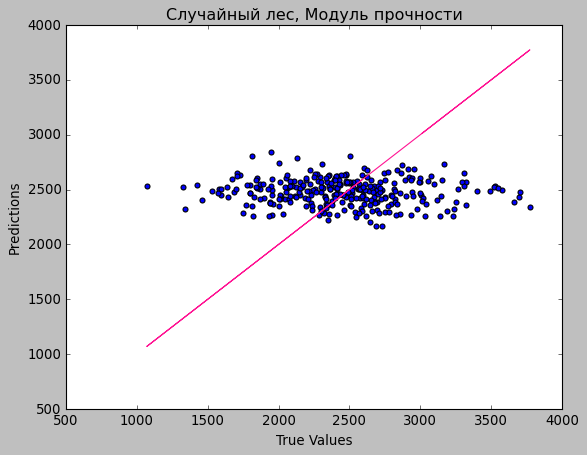

In [72]:
plt.scatter(y3_test, y3_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(y3_test, y3_test, c = 'deeppink')
plt.title('Случайный лес, Модуль прочности');

In [73]:
#Попытка построения регрессии с меньшим количеством входных параметров. Работы ведется исключительно с выборкой приведенной 
#в первом файле, без учета нашивки

In [74]:
df_1

,Density,E,Hardener,Epoxide,T,Surface density,Resin,Tangle_stripe,Step_stripe,Density_stripe
0,2030.000000,738.736842,-2.853026,22.267857,100.000000,210.000000,220.000000,0,4.000000,57.000000
1,2030.000000,738.736842,-2.144620,23.750000,284.615385,210.000000,220.000000,0,4.000000,60.000000
3,2030.000000,738.736842,0.653583,21.250000,300.000000,210.000000,220.000000,0,5.000000,47.000000
4,2030.000000,753.000000,0.046479,22.267857,284.615385,210.000000,220.000000,0,5.000000,57.000000
5,2000.000000,748.000000,0.046479,22.267857,284.615385,210.000000,220.000000,0,5.000000,60.000000
...,...,...,...,...,...,...,...,...,...,...
1018,1952.087902,912.855545,-0.834346,20.123249,324.774576,209.198700,125.007669,90,9.076380,47.019770
1019,2050.089171,444.732634,1.255089,19.599769,254.215401,350.660830,117.730099,90,10.565614,53.750790
1020,1972.372865,416.836524,-0.000507,23.957502,248.423047,740.142791,236.606764,90,4.161154,67.629684
1021,2066.799773,741.475517,1.092722,19.246945,275.779840,641.468152,197.126067,90,6.313201,58.261074


In [75]:
df_2 = df_1.drop (["Tangle_stripe", "Step_stripe", "Density_stripe"], axis =1)


In [76]:
df_2

,Density,E,Hardener,Epoxide,T,Surface density,Resin
0,2030.000000,738.736842,-2.853026,22.267857,100.000000,210.000000,220.000000
1,2030.000000,738.736842,-2.144620,23.750000,284.615385,210.000000,220.000000
3,2030.000000,738.736842,0.653583,21.250000,300.000000,210.000000,220.000000
4,2030.000000,753.000000,0.046479,22.267857,284.615385,210.000000,220.000000
5,2000.000000,748.000000,0.046479,22.267857,284.615385,210.000000,220.000000
...,...,...,...,...,...,...,...
1018,1952.087902,912.855545,-0.834346,20.123249,324.774576,209.198700,125.007669
1019,2050.089171,444.732634,1.255089,19.599769,254.215401,350.660830,117.730099
1020,1972.372865,416.836524,-0.000507,23.957502,248.423047,740.142791,236.606764
1021,2066.799773,741.475517,1.092722,19.246945,275.779840,641.468152,197.126067


In [77]:
X_train, X_test, y4_train, y4_test = train_test_split(df_2, y1_df, test_size=0.3, random_state=1)

In [78]:
model = Sequential([
    Dense(7, activation='relu', input_dim=7),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, ),
])

model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 10)                80        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 477
Trainable params: 477
Non-trainable 

In [79]:
model_4 = model.fit(X_train, y4_train, batch_size=32, epochs=10)

Epoch 1/10
23/23 [==============================] - 0s 1ms/step - loss: 15.9520 - mse: 499.1180
Epoch 2/10
23/23 [==============================] - 0s 1ms/step - loss: 2.6617 - mse: 10.9087
Epoch 3/10
23/23 [==============================] - 0s 1ms/step - loss: 1.2135 - mse: 2.3106
Epoch 4/10
23/23 [==============================] - 0s 1ms/step - loss: 0.8500 - mse: 1.1286
Epoch 5/10
23/23 [==============================] - 0s 1ms/step - loss: 0.8136 - mse: 1.0162
Epoch 6/10
23/23 [==============================] - 0s 1ms/step - loss: 0.7918 - mse: 0.9554
Epoch 7/10
23/23 [==============================] - 0s 1ms/step - loss: 0.7987 - mse: 1.0015
Epoch 8/10
23/23 [==============================] - 0s 1ms/step - loss: 0.7775 - mse: 0.9478
Epoch 9/10
23/23 [==============================] - 0s 1ms/step - loss: 0.8369 - mse: 1.0922
Epoch 10/10
23/23 [==============================] - 0s 1ms/step - loss: 0.8029 - mse: 0.9934


In [80]:
model.evaluate(X_test, y4_test)

10/10 [==============================] - 0s 1000us/step - loss: 0.9554 - mse: 1.3169


[0.9553554058074951, 1.3168995380401611]

In [81]:
y4_pred = model.predict(X_test)

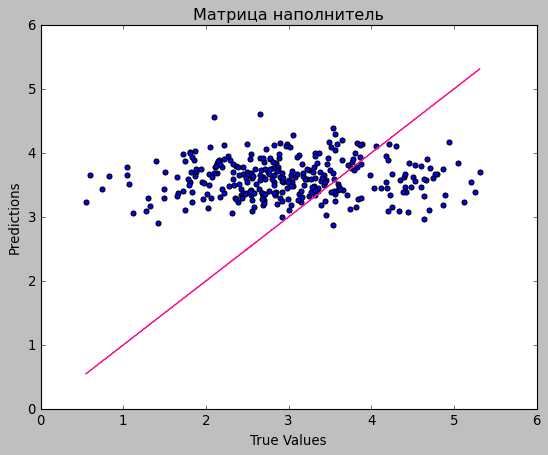

In [82]:
plt.scatter(y4_test, y4_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(y4_test, y4_test, c = 'deeppink')
plt.title('Матрица наполнитель');
#plt.scatter

In [83]:
X_train, X_test, y6_train, y6_test = train_test_split(df_2, y3_df, test_size=0.3, random_state=1)

In [84]:
model_6 = model.fit(X_train, y6_train, batch_size=64, epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 2454.3281 - mse: 6269533.0000
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 2339.8872 - mse: 5721600.5000
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 1940.8871 - mse: 4040911.0000
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 875.3171 - mse: 1103897.7500
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 544.3625 - mse: 461552.5938
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 482.2078 - mse: 363653.3438
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 461.4063 - mse: 328575.2188
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 444.4087 - mse: 306167.5625
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 448.9691 - mse: 312239.2188
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 449.4376 -

12/12 [==============================] - 0s 1ms/step - loss: 409.2885 - mse: 260084.6562
Epoch 82/100
12/12 [==============================] - 0s 1ms/step - loss: 412.9762 - mse: 263887.9688
Epoch 83/100
12/12 [==============================] - 0s 1ms/step - loss: 411.7660 - mse: 265568.3750
Epoch 84/100
12/12 [==============================] - 0s 1ms/step - loss: 409.3129 - mse: 260583.7031
Epoch 85/100
12/12 [==============================] - 0s 1ms/step - loss: 408.4625 - mse: 260019.6250
Epoch 86/100
12/12 [==============================] - 0s 1ms/step - loss: 408.9497 - mse: 260333.5938
Epoch 87/100
12/12 [==============================] - 0s 1ms/step - loss: 412.0507 - mse: 264359.5625
Epoch 88/100
12/12 [==============================] - 0s 1ms/step - loss: 409.3700 - mse: 260759.1719
Epoch 89/100
12/12 [==============================] - 0s 1ms/step - loss: 407.8332 - mse: 258885.4531
Epoch 90/100
12/12 [==============================] - 0s 1ms/step - loss: 408.6174 - mse: 25956

In [85]:
model.evaluate(X_test, y6_test)

10/10 [==============================] - 0s 888us/step - loss: 369.4233 - mse: 230372.3750


[369.4233093261719, 230372.375]

In [86]:
y6_pred = model.predict(X_test)

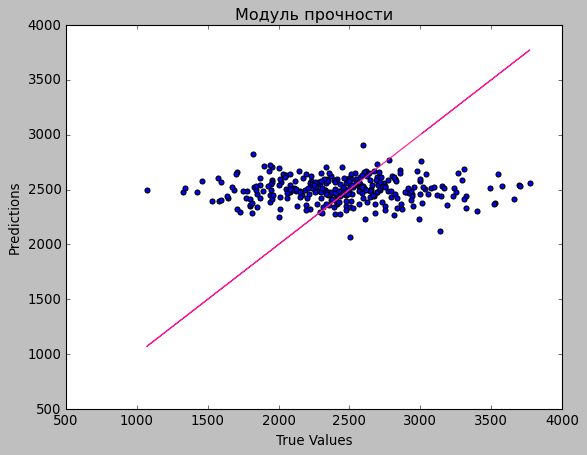

In [87]:
plt.scatter(y6_test, y6_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(y6_test, y6_test, c = 'deeppink')
plt.title('Модуль прочности');
#plt.scatter

In [88]:
model.save("Strength")

INFO:tensorflow:Assets written to: Strength\assets


In [89]:
str = np.array(X_test)[0]

In [90]:
str

array([1.96673390e+03, 4.31352926e+02, 1.28518718e+00, 2.30843970e+01,
       2.98971092e+02, 2.18383484e+02, 2.00006492e+02])

In [91]:
str.shape

(7,)

In [92]:
str.reshape(1, 7)

array([[1.96673390e+03, 4.31352926e+02, 1.28518718e+00, 2.30843970e+01,
        2.98971092e+02, 2.18383484e+02, 2.00006492e+02]])

In [93]:
str_pred = [[ 1.96673390e+03    , 4.31352926e+02    , 1.28518718e+00    ,  2.30843970e+01    ,  2.98971092e+02    ,
             2.18383484e+02, 2.00006492e+02]]

In [94]:
model.predict(str.reshape(1, 7))

array([[2505.3547]], dtype=float32)

In [95]:
model.predict(str_pred)

array([[2505.3547]], dtype=float32)

In [96]:
str_pred2 = [[ 4000    , 500    , 2    ,  29    ,  350    ,
             250, 100]]

In [97]:
model.predict(str_pred2)

array([[4250.4424]], dtype=float32)

In [100]:
model.predict([[ 4000    , 500    , 2    ,  29    ,  350    , 250, 100]])

array([[4250.4424]], dtype=float32)

In [ ]:
regr = MLPRegressor (hidden_layer_sizes=(100,), random_state=1, max_iter=10000, activation='relu').fit(X_train, y_train)

In [ ]:
predictions = regr.predict(X_test)

In [ ]:
regr.score(X_test, y_test)

In [ ]:
plt.scatter(y_test, predictions)